In [1]:
import numpy as np
from scipy import misc
import scipy
import os
import pylab as plt
import pandas as pd
import skimage

imgPath = "./dataset/poster_image/new/"
labelPath = "./dataset/MovieGenre_fix_leekeon_total.csv"
imgSize = (134, 91)

In [5]:
def preprocess(img, size=(134, 91)):
    img = scipy.misc.imresize(img, size)
    img = img.astype(np.float32)
    img = (img / 127.5) - 1.
    return img

def min_max_scaling(x, size=(134, 91)):
    x = scipy.misc.imresize(x, size)
    #x = skimage.transform.resize(x,size)
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7)

def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

In [6]:
encoding = 'euc-kr' # 문자 인코딩
movie_df = pd.read_csv(labelPath, encoding="ISO-8859-1") #판다스이용 csv파일 로딩

In [7]:
movie_df.head()

,1292566,1292566.1,http://www.imdb.com/title/tt1292566,http://www.imdb.com/title/tt1292566.1,How to Be Single,2016),6.1,Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BNzI4MDMwMzUwNF5BMl5BanBnXkFtZTgwMDgyNzkyNzE@._V1_UX182_CR0,0,182,268_AL_.jpg"
0,3530978,3530978,http://www.imdb.com/title/tt3530978,http://www.imdb.com/title/tt3530978,La corrispondenza,2016),6.0,Romance,https://images-na.ssl-images-amazon.com/images...
1,4399594,4399594,http://www.imdb.com/title/tt4399594,http://www.imdb.com/title/tt4399594,Fitoor,2016),5.4,Romance,https://images-na.ssl-images-amazon.com/images...
2,2674426,2674426,http://www.imdb.com/title/tt2674426,http://www.imdb.com/title/tt2674426,Me Before You,2016),7.4,Romance,https://images-na.ssl-images-amazon.com/images...
3,4366830,4366830,http://www.imdb.com/title/tt4366830,http://www.imdb.com/title/tt4366830,Grease Live!,2016),7.5,Romance,https://images-na.ssl-images-amazon.com/images...
4,4385026,4385026,http://www.imdb.com/title/tt4385026,http://www.imdb.com/title/tt4385026,Providence,2016),7.7,Romance,https://images-na.ssl-images-amazon.com/images...


In [8]:
movieid_2_genre = {}
genre_2_labelid = {}
labelid_2_genre = {}

for movie in movie_df.values:
    print(movie[7])
    movieid_2_genre[movie[0]] = movie[7]
    
    if movie[7] not in genre_2_labelid:
        if(movie[7]=='Adventure' 
         or movie[7]=='Documentary'
         or movie[7]=='Romance'
         or movie[7]=='Horror'):
            genre_2_labelid[movie[7]] = len(genre_2_labelid)

    for i, genre in enumerate(genre_2_labelid):
        labelid_2_genre[i] = genre

Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance
Romance


Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Horror

Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Documentary
Docu

In [9]:
genre_2_labelid

{'Adventure': 2, 'Documentary': 3, 'Horror': 1, 'Romance': 0}

In [10]:
files = [file for file in os.listdir(imgPath) 
         if os.path.isfile(os.path.join(imgPath,file))]

train_size = int(len(files) * 0.7)
test_size = len(files) - train_size

train_files = files[0:train_size]
test_files = files[train_size:len(files)]

In [11]:
train_files

['1618448.jpg',
 '2075373.jpg',
 '4082466.jpg',
 '185371.jpg',
 '2125608.jpg',
 '2571226.jpg',
 '1538545.jpg',
 '4361050.jpg',
 '181012.jpg',
 '860454.jpg',
 '2848324.jpg',
 '454839.jpg',
 '311730.jpg',
 '266555.jpg',
 '1733679.jpg',
 '197765.jpg',
 '498120.jpg',
 '2106577.jpg',
 '59168.jpg',
 '387549.jpg',
 '32281.jpg',
 '332452.jpg',
 '3271220.jpg',
 '167346.jpg',
 '4193394.jpg',
 '1620466.jpg',
 '1711018.jpg',
 '3526810.jpg',
 '1838722.jpg',
 '1254978.jpg',
 '407265.jpg',
 '91059.jpg',
 '1291547.jpg',
 '3148890.jpg',
 '2577876.jpg',
 '464071.jpg',
 '2414212.jpg',
 '843302.jpg',
 '1644669.jpg',
 '1189374.jpg',
 '450664.jpg',
 '2207870.jpg',
 '5895028.jpg',
 '477253.jpg',
 '243508.jpg',
 '115472.jpg',
 '367097.jpg',
 '80853.jpg',
 '2194328.jpg',
 '2165236.jpg',
 '3462002.jpg',
 '1702014.jpg',
 '454082.jpg',
 '117883.jpg',
 '87129.jpg',
 '308383.jpg',
 '3329246.jpg',
 '280969.jpg',
 '77470.jpg',
 '2230358.jpg',
 '90327.jpg',
 '476958.jpg',
 '323033.jpg',
 '54678.jpg',
 '32356.jpg',
 '1

In [12]:
import random
random.shuffle(train_files)

In [15]:
for file in train_files:
    fid = int(file.split('.')[0])
    genre = movieid_2_genre[fid]
    if(genre=='Adventure' 
               or genre=='Documentary'
               or genre=='Romance'
               or genre=='Horror'):
        print(genre)

Horror
Horror
Horror
Adventure
Adventure
Adventure
Horror
Documentary
Adventure
Horror
Horror
Romance
Adventure
Adventure
Horror
Adventure
Horror
Horror
Romance
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Romance
Documentary
Romance
Documentary
Adventure
Adventure
Adventure
Horror
Adventure
Horror
Adventure
Horror
Adventure
Horror
Horror
Horror
Horror
Horror
Horror
Horror
Romance
Horror
Horror
Horror
Horror
Adventure
Documentary
Horror
Horror
Romance
Horror
Horror
Horror
Horror
Adventure
Horror
Documentary
Documentary
Adventure
Adventure
Horror
Romance
Documentary
Horror
Adventure
Adventure
Documentary
Horror
Horror
Documentary
Horror
Horror
Horror
Documentary
Documentary
Documentary
Adventure
Adventure
Documentary
Documentary
Horror
Romance
Horror
Horror
Documentary
Documentary
Horror
Horror
Horror
Horror
Horror
Adventure
Romance
Horror
Documentary
Horror
Adventure
Horror
Adventure
Horror
Horror
Horror
Horror
Adventure
Horror
Romance
Horror
Horror
Horror
Horror
Horror
Horror
Horr

In [20]:
h_cnt = 0
for file in train_files:
    fid = int(file.split('.')[0])
    genre = movieid_2_genre[fid]
    if(genre=='Adventure'):
        h_cnt += 1
print(h_cnt)

330


In [12]:
x_train = []
y_train = []
for file in train_files:
    #img = min_max_scaling(misc.imread(imgPath+file))
    #x_train.append(img)
    fid = int(file.split('.')[0])
    lid = []
    g = movieid_2_genre[fid].split('|')
    l = np.sum([np.eye(24, dtype="uint8")[genre_2_labelid[s]] 
                                                        for s in g], axis=0)
    
    y_train.append(l)
    #for genre in movieid_2_genre[fid].split('|'):
    #    lid.append(genre_2_labelid[genre])
    #y_train.append(lid)
        
    #lid = genre_2_labelid[movieid_2_genre[fid]]
    #y_train.append(lid)
print('x_train length', len(x_train))
print('y_train length', len(y_train))


KeyError: 'Biography'

In [ ]:
x_test = []
y_test = []
for file in test_files:
    img = min_max_scaling(misc.imread(imgPath+file))
    x_test.append(img)
    fid = int(file.split('.')[0])
    lid = genre_2_labelid[movieid_2_genre[fid]]
    y_test.append(lid)
    
print('x_test length', len(x_test))
print('y_test length', len(y_test))

In [13]:
x_train = []
y_train = []
for file in train_files:
    print(imgPath+file)
    #img = min_max_scaling(misc.imread(imgPath+file))
    #img.
    #x_train.append(img)
    #fid = int(file.split('.')[0])
    #lid = genre_2_labelid[movieid_2_genre[fid]]
    #y_train.append(lid)

./dataset/poster_image/new/89274.jpg
./dataset/poster_image/new/1992193.jpg
./dataset/poster_image/new/282100.jpg
./dataset/poster_image/new/2639344.jpg
./dataset/poster_image/new/75989.jpg
./dataset/poster_image/new/3811986.jpg
./dataset/poster_image/new/3484800.jpg
./dataset/poster_image/new/352343.jpg
./dataset/poster_image/new/1354564.jpg
./dataset/poster_image/new/252028.jpg
./dataset/poster_image/new/1065060.jpg
./dataset/poster_image/new/193524.jpg
./dataset/poster_image/new/169547.jpg
./dataset/poster_image/new/211492.jpg
./dataset/poster_image/new/265101.jpg
./dataset/poster_image/new/400383.jpg
./dataset/poster_image/new/167925.jpg
./dataset/poster_image/new/140825.jpg
./dataset/poster_image/new/61870.jpg
./dataset/poster_image/new/118800.jpg
./dataset/poster_image/new/425125.jpg
./dataset/poster_image/new/3138558.jpg
./dataset/poster_image/new/276868.jpg
./dataset/poster_image/new/1242842.jpg
./dataset/poster_image/new/2947556.jpg
./dataset/poster_image/new/2507238.jpg
./dat

./dataset/poster_image/new/881320.jpg
./dataset/poster_image/new/38032.jpg
./dataset/poster_image/new/388285.jpg
./dataset/poster_image/new/84096.jpg
./dataset/poster_image/new/3395184.jpg
./dataset/poster_image/new/2542368.jpg
./dataset/poster_image/new/77756.jpg
./dataset/poster_image/new/251590.jpg
./dataset/poster_image/new/1105742.jpg
./dataset/poster_image/new/155267.jpg
./dataset/poster_image/new/155975.jpg
./dataset/poster_image/new/85303.jpg
./dataset/poster_image/new/5465868.jpg
./dataset/poster_image/new/49092.jpg
./dataset/poster_image/new/2343617.jpg
./dataset/poster_image/new/75987.jpg
./dataset/poster_image/new/2415458.jpg
./dataset/poster_image/new/107384.jpg
./dataset/poster_image/new/1018817.jpg
./dataset/poster_image/new/2626102.jpg
./dataset/poster_image/new/1857772.jpg
./dataset/poster_image/new/494222.jpg
./dataset/poster_image/new/3661072.jpg
./dataset/poster_image/new/95334.jpg
./dataset/poster_image/new/901476.jpg
./dataset/poster_image/new/38182.jpg
./dataset/

In [14]:
img = misc.imread('./dataset/poster_image/new/89274.jpg')

/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [16]:
img = np.asarray(img)

In [17]:
img.shape

(268, 182, 3)

In [ ]:
genre_2_labelid = {
 'News': 23,   
 'Action': 22,
 'Adventure': 21,
 'Animation': 20,
 'Biography': 19,
 'Comedy': 18,
 'Crime': 17,
 'Documentary': 16,
 'Drama': 15,
 'Family': 14,
 'Fantasy': 13,
 'Film-Noir': 12,
 'History': 11,
 'Horror': 10,
 'Music': 9,
 'Musical': 8,
 'Mystery': 7,
 'Romance': 6,
 'Sci-Fi': 5,
 'Short': 4,
 'Sport': 3,
 'Thriller': 2,
 'War': 1,
 'Western': 0}

In [34]:
genre_2_labelid

{'Action': 22,
 'Adventure': 21,
 'Animation': 20,
 'Biography': 19,
 'Comedy': 18,
 'Crime': 17,
 'Documentary': 16,
 'Drama': 15,
 'Family': 14,
 'Fantasy': 13,
 'Film-Noir': 12,
 'History': 11,
 'Horror': 10,
 'Music': 9,
 'Musical': 8,
 'Mystery': 7,
 'News': 23,
 'Romance': 6,
 'Sci-Fi': 5,
 'Short': 4,
 'Sport': 3,
 'Thriller': 2,
 'War': 1,
 'Western': 0}

In [3]:
img = misc.imread('./dataset/poster_image/new/2153963.jpg')

/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [13]:
def to_rgb2(im):
    # as 1, but we use broadcasting in one line
    w, h = im.shape
    ret = np.empty((w, h, 3), dtype=np.uint8)
    ret[:, :, :] = im[:, :, np.newaxis]
    return ret

In [14]:
img2 = to_rgb2(img)

In [15]:
img2.shape

(268, 182, 3)

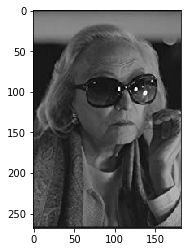

In [16]:
plt.imshow(img2)
plt.show()